<a href="https://colab.research.google.com/github/zeyadhessuin/Machine-Learning/blob/master/Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
from pathlib import Path
import os.path
from keras.utils import np_utils
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, Activation, Flatten)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# dataset_url = 'https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition'
train_path='/content/drive/MyDrive/fruits/train'
val_path='/content/drive/MyDrive/fruits/validation'
test_path = '/content/drive/MyDrive/fruits/test'

train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_data = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

class_names = train_data.class_names

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(96, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(36, activation='softmax')
])

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=train_data,
                    epochs= 20,
                    validation_data=val_data)

Epoch 1/20
98/98 [==============================] - 82s 756ms/step - loss: 3.0931 - accuracy: 0.1640 - val_loss: 2.8667 - val_accuracy: 0.2593
Epoch 2/20
98/98 [==============================] - 77s 735ms/step - loss: 2.1795 - accuracy: 0.3573 - val_loss: 1.7116 - val_accuracy: 0.4644
Epoch 3/20
98/98 [==============================] - 77s 739ms/step - loss: 1.8375 - accuracy: 0.4552 - val_loss: 1.3620 - val_accuracy: 0.5897
Epoch 4/20
98/98 [==============================] - 75s 722ms/step - loss: 1.5396 - accuracy: 0.5329 - val_loss: 0.9899 - val_accuracy: 0.7322
Epoch 5/20
98/98 [==============================] - 76s 727ms/step - loss: 1.3407 - accuracy: 0.5920 - val_loss: 1.0214 - val_accuracy: 0.7151
Epoch 6/20
98/98 [==============================] - 76s 726ms/step - loss: 1.0734 - accuracy: 0.6722 - val_loss: 0.6177 - val_accuracy: 0.8348
Epoch 7/20
98/98 [==============================] - 76s 733ms/step - loss: 0.9336 - accuracy: 0.7188 - val_loss: 0.6548 - val_accuracy: 0.8120

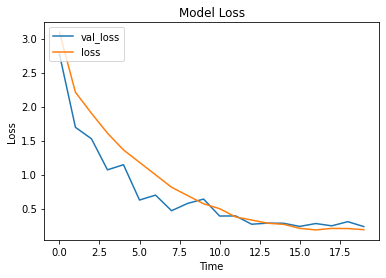

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

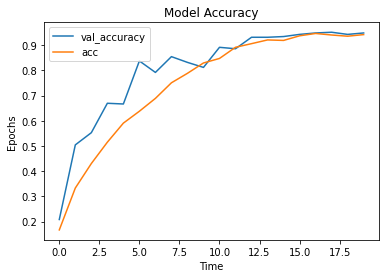

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

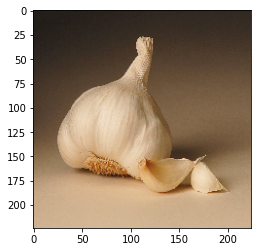

Actual: garlic
Predicted: garlic


In [ ]:
from keras_preprocessing import image
image_path="/content/drive/MyDrive/fruits/test/garlic/Image_4.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

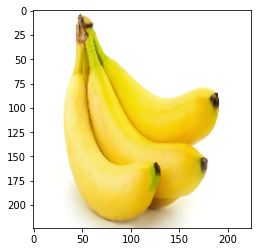

Actual: banana
Predicted: banana


In [ ]:
from keras_preprocessing import image
image_path="/content/drive/MyDrive/fruits/test/banana/Image_4.jpg"
img = image.load_img(image_path, target_size=(224,224,3))
plt.imshow(img)
plt.show()
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = model.predict(images, batch_size=32)
label = np.argmax(pred, axis=1)
print("Actual: "+image_path.split("/")[-2])
print("Predicted: "+class_names[np.argmax(pred)])

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = classes[0].tolist()
  print(result)
  index = result.index(max(result))
  labels = {0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce',
          19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}
  print(labels[index])

Saving 4315.jpeg to 4315 (1).jpeg
[0.9994899034500122, 4.2118792009659956e-08, 5.921119736740366e-07, 2.436780732750776e-07, 9.557418745309576e-11, 0.00013647446758113801, 9.678812602942344e-06, 9.124642014191053e-11, 6.685364724035026e-07, 1.8797280176841014e-08, 6.336269842144304e-10, 3.2489321455386744e-08, 2.2176316338828883e-10, 6.81835587990065e-10, 1.2080552380666632e-07, 6.03350329697605e-08, 4.103381801012773e-10, 8.314715138624251e-09, 9.560577884926147e-10, 8.255818251257097e-09, 1.3942489204055164e-05, 1.0511298569326755e-06, 3.738136001629755e-06, 5.588606910578164e-09, 8.094642144074182e-12, 2.2142082798382035e-06, 0.00022187088325154036, 1.2243498304087552e-07, 2.1880366602999857e-06, 1.535043203659825e-09, 5.2373428510721354e-11, 1.2131639026691232e-09, 1.298481322464795e-07, 0.00011551550414878875, 7.419919967333044e-08, 1.0734715942817274e-06]
apple


In [ ]:
model.save('Fruits_Cat.h5')

In [ ]:
'''import streamlit as st
from PIL import Image
from keras.preprocessing.image import load_img,img_to_array
import numpy as np
from keras.models import load_model
import requests
from bs4 import BeautifulSoup

model = load_model('Fruits.h5')
labels = {0: 'apple', 1: 'banana', 2: 'beetroot', 3: 'bell pepper', 4: 'cabbage', 5: 'capsicum', 6: 'carrot', 7: 'cauliflower', 8: 'chilli pepper', 9: 'corn', 10: 'cucumber', 11: 'eggplant', 12: 'garlic', 13: 'ginger', 14: 'grapes', 15: 'jalepeno', 16: 'kiwi', 17: 'lemon', 18: 'lettuce',
          19: 'mango', 20: 'onion', 21: 'orange', 22: 'paprika', 23: 'pear', 24: 'peas', 25: 'pineapple', 26: 'pomegranate', 27: 'potato', 28: 'raddish', 29: 'soy beans', 30: 'spinach', 31: 'sweetcorn', 32: 'sweetpotato', 33: 'tomato', 34: 'turnip', 35: 'watermelon'}

fruits = ['Apple','Banana','Bello Pepper','Chilli Pepper','Grapes','Jalepeno','Kiwi','Lemon','Mango','Orange','Paprika','Pear','Pineapple','Pomegranate','Watermelon']
vegetables = ['Beetroot','Cabbage','Capsicum','Carrot','Cauliflower','Corn','Cucumber','Eggplant','Ginger','Lettuce','Onion','Peas','Potato','Raddish','Soy Beans','Spinach','Sweetcorn','Sweetpotato','Tomato','Turnip']

def fetch_calories(prediction):
    try:
        url = 'https://www.google.com/search?&q=calories in ' + prediction
        req = requests.get(url).text
        scrap = BeautifulSoup(req, 'html.parser')
        calories = scrap.find("div", class_="BNeawe iBp4i AP7Wnd").text
        return calories
    except Exception as e:
        st.error("Can't able to fetch the Calories")
        print(e)

def processed_img(img_path):
    img=load_img(img_path,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    print(y_class)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    print(res)
    return res.capitalize()

def run():
    st.title("Fruits🍍-Vegetable🍅 Classification")
    img_file = st.file_uploader("Choose an Image", type=["jpg", "png"])
    if img_file is not None:
        img = Image.open(img_file).resize((250,250))
        st.image(img,use_column_width=False)
        save_image_path = './upload_images/'+img_file.name
        with open(save_image_path, "wb") as f:
            f.write(img_file.getbuffer())

        # if st.button("Predict"):
        if img_file is not None:
            result= processed_img(save_image_path)
            print(result)
            if result in vegetables:
                st.info('**Category : Vegetables**')
            else:
                st.info('**Category : Fruit**')
            st.success("**Predicted : "+result+'**')
            cal = fetch_calories(result)
            if cal:
                st.warning('**'+cal+'(100 grams)**')
run()'''

'import streamlit as st\nfrom PIL import Image\nfrom keras.preprocessing.image import load_img,img_to_array\nimport numpy as np\nfrom keras.models import load_model\nimport requests\nfrom bs4 import BeautifulSoup\n\nmodel = load_model(\'Fruits.h5\')\nlabels = {0: \'apple\', 1: \'banana\', 2: \'beetroot\', 3: \'bell pepper\', 4: \'cabbage\', 5: \'capsicum\', 6: \'carrot\', 7: \'cauliflower\', 8: \'chilli pepper\', 9: \'corn\', 10: \'cucumber\', 11: \'eggplant\', 12: \'garlic\', 13: \'ginger\', 14: \'grapes\', 15: \'jalepeno\', 16: \'kiwi\', 17: \'lemon\', 18: \'lettuce\',\n          19: \'mango\', 20: \'onion\', 21: \'orange\', 22: \'paprika\', 23: \'pear\', 24: \'peas\', 25: \'pineapple\', 26: \'pomegranate\', 27: \'potato\', 28: \'raddish\', 29: \'soy beans\', 30: \'spinach\', 31: \'sweetcorn\', 32: \'sweetpotato\', 33: \'tomato\', 34: \'turnip\', 35: \'watermelon\'}\n\nfruits = [\'Apple\',\'Banana\',\'Bello Pepper\',\'Chilli Pepper\',\'Grapes\',\'Jalepeno\',\'Kiwi\',\'Lemon\',\'Mango